In [11]:
import numpy as np
from utilities import data_management_utils as data_utils
from utilities import utils as utils
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
real_data_path = './data/complete_data/'
index_file_path = './data/stone_classification/ZusammenfassungMinerale.xlsx'

args = data_utils.data_prep_full_data_MP(real_data_path, index_file_path, central_grid=True)


real_MP_intensity_data, real_MP_labels, real_MP_y, real_MP_rocks = args

In [3]:
print('There are {} samples'.format(real_MP_intensity_data.shape[0]))

classes, counts= np.unique(real_MP_labels, return_counts=True)
print('There are {} different classes'.format(classes.shape[0]))
print('The average number of samples for each class is:', np.mean(counts))
print('There are {} classes that have less than half of'
      ' the average number of samples'.format(classes[counts < np.mean(counts)/2].size))

print(classes[counts < np.mean(counts)/2])

There are 559 samples
There are 8 different classes
The average number of samples for each class is: 69.875
There are 2 classes that have less than half of the average number of samples
['borates and nitrates' 'halides']


In [4]:
for i in range(classes.size):
    print(classes[i] + ':', np.round(counts[i]/np.sum(counts), 4), '-', counts[i])

borates and nitrates: 0.0072 - 4
carbonates: 0.1395 - 78
halides: 0.0286 - 16
oxides: 0.102 - 57
phosphates, arsenates and vanadates: 0.1717 - 96
quartz and silicates: 0.0823 - 46
sulfides: 0.3238 - 181
sulphates, chromates, molybdates and wolframates: 0.1449 - 81


In [10]:
# Checks that the two least common classes are common enough to be present in both test and training set
stones = list(set(zip(real_MP_labels.tolist(), real_MP_rocks.tolist())))
stones.sort()

for stone in stones:
    test_set = (real_MP_labels == stone[0]) & (real_MP_rocks == stone[1])
    test_y = real_MP_y[test_set]
    train_set = ~test_set
    
    if test_y[0][0] == 1:
        assert real_MP_labels[train_set & (real_MP_labels == 'borates and nitrates')].shape[0] != 0
    
    if test_y[0][2] == 1:
        assert real_MP_labels[train_set & (real_MP_labels == 'halides')].shape[0] != 0 

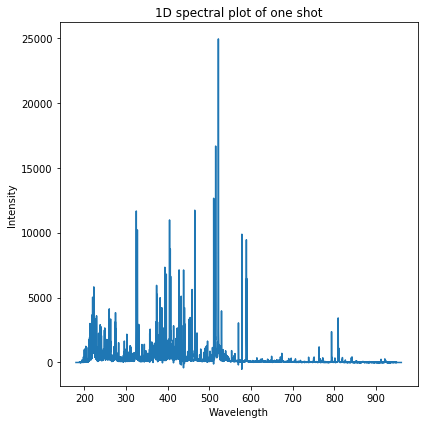

In [19]:
spectra_1d = pd.read_csv('./data/190520_mod/chalkosin-042-session_2_55PM-shot(37).csv')

plt.figure(figsize=(6,6))
plt.plot(spectra_1d['wavelength'], spectra_1d['intensity'])
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('1D spectral plot of one shot')
image_filename = '1D_spectra.png'
plt.tight_layout()
plt.savefig('Plots/' + image_filename, dpi=500)
plt.show()